## Sequence to Sequence: Encoder & Decoder Architecture

In [10]:
import copy
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split, \
TensorDataset
from data_generation.square_sequence import generate_sequences
from stepbystep.v4 import StepByStep

In [11]:
#Creating data points (of squares) and their direction
points, directions=generate_sequences(n=128, seed=13)

## Encoder
" The encoder's goal is to generate a representation of the $\textbf{source sequence}$, that is, to encode it

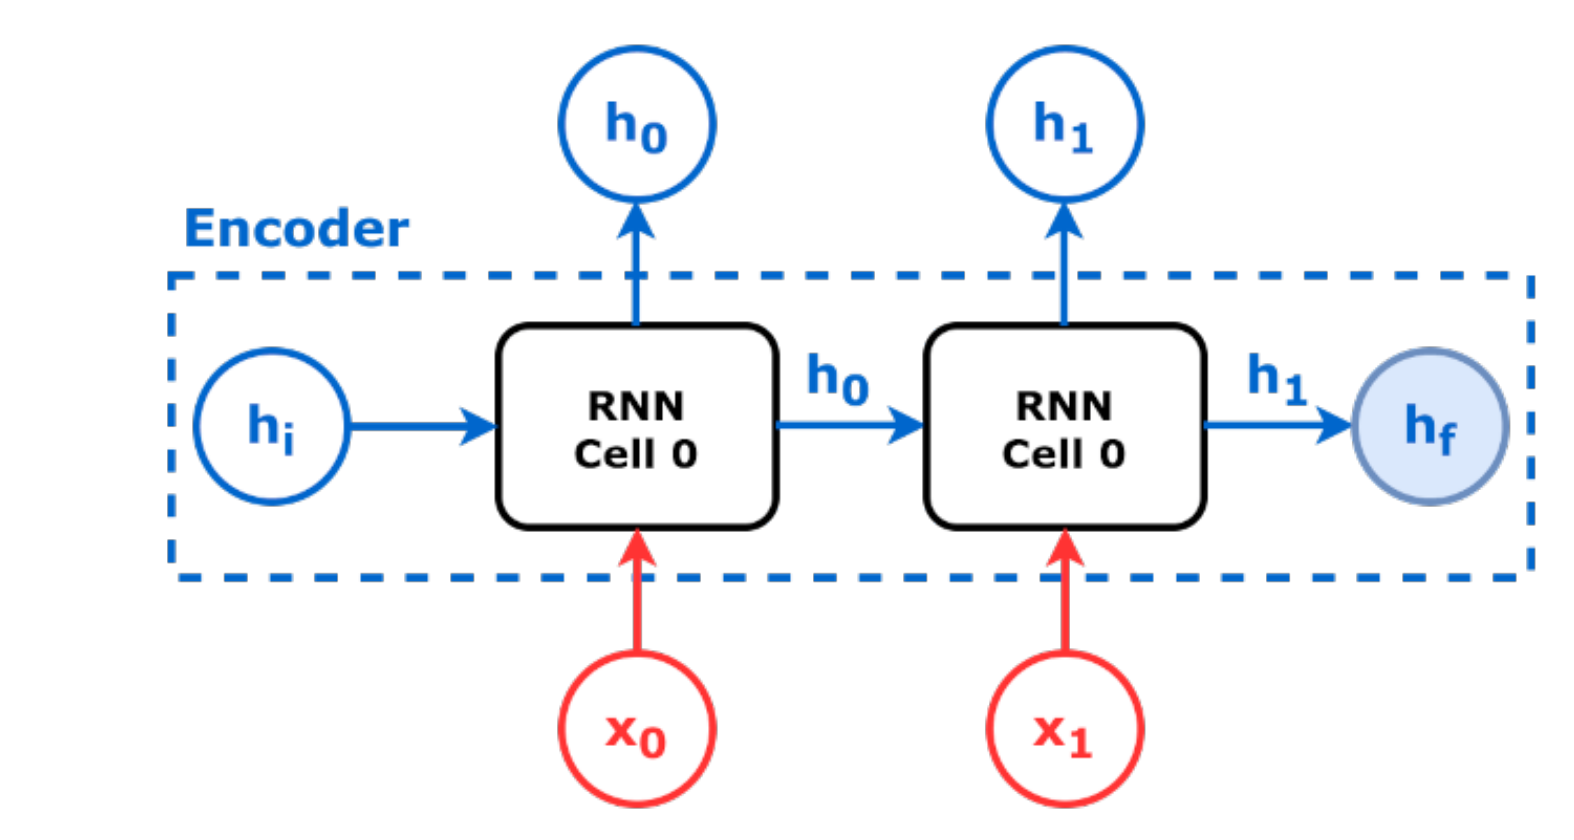

In [21]:
class Encoder(nn.Module):
    def __init__(self, n_features, hidden_dim):
        super().__init__()
        self.hidden_dim=hidden_dim
        self.n_features=n_features
        self.hidden=None
        self.basic_rnn=nn.GRU(
        self.n_features,
        self.hidden_dim,
        batch_first=True)
    
    def forward(self, X):
        rnn_out, self.hidden=self.basic_rnn(X)
        
        return rnn_out
        

In [22]:
#ejemplo de un cuadrado perfecto
full_seq=(torch.tensor([[-1,-1],[-1,1],[1,1],[1,-1]])).float().view(1,4,2)
source_seq=full_seq[:,:2,:]
target_seq=full_seq[:,2:,:]

In [23]:
source_seq, source_seq.size()

(tensor([[[-1., -1.],
          [-1.,  1.]]]),
 torch.Size([1, 2, 2]))

In [24]:
torch.manual_seed(21)
encoder=Encoder(n_features=2, hidden_dim=2)
hidden_seq=encoder(source_seq) #output N, L F
hidden_seq

tensor([[[ 0.0832, -0.0356],
         [ 0.3105, -0.5263]]], grad_fn=<TransposeBackward1>)

In [28]:
#The last hidden state is the one that encode in a better way the whole sequence
final_state=hidden_seq[:,-1:,:]
final_state

tensor([[[ 0.3105, -0.5263]]], grad_fn=<SliceBackward>)

## Decoder
The decoder's goal is to generate the target sequence from an initial representation, that is, to decode it

In order to decode the hidden state of into a sequence, the decoder needs a recurent layer as well
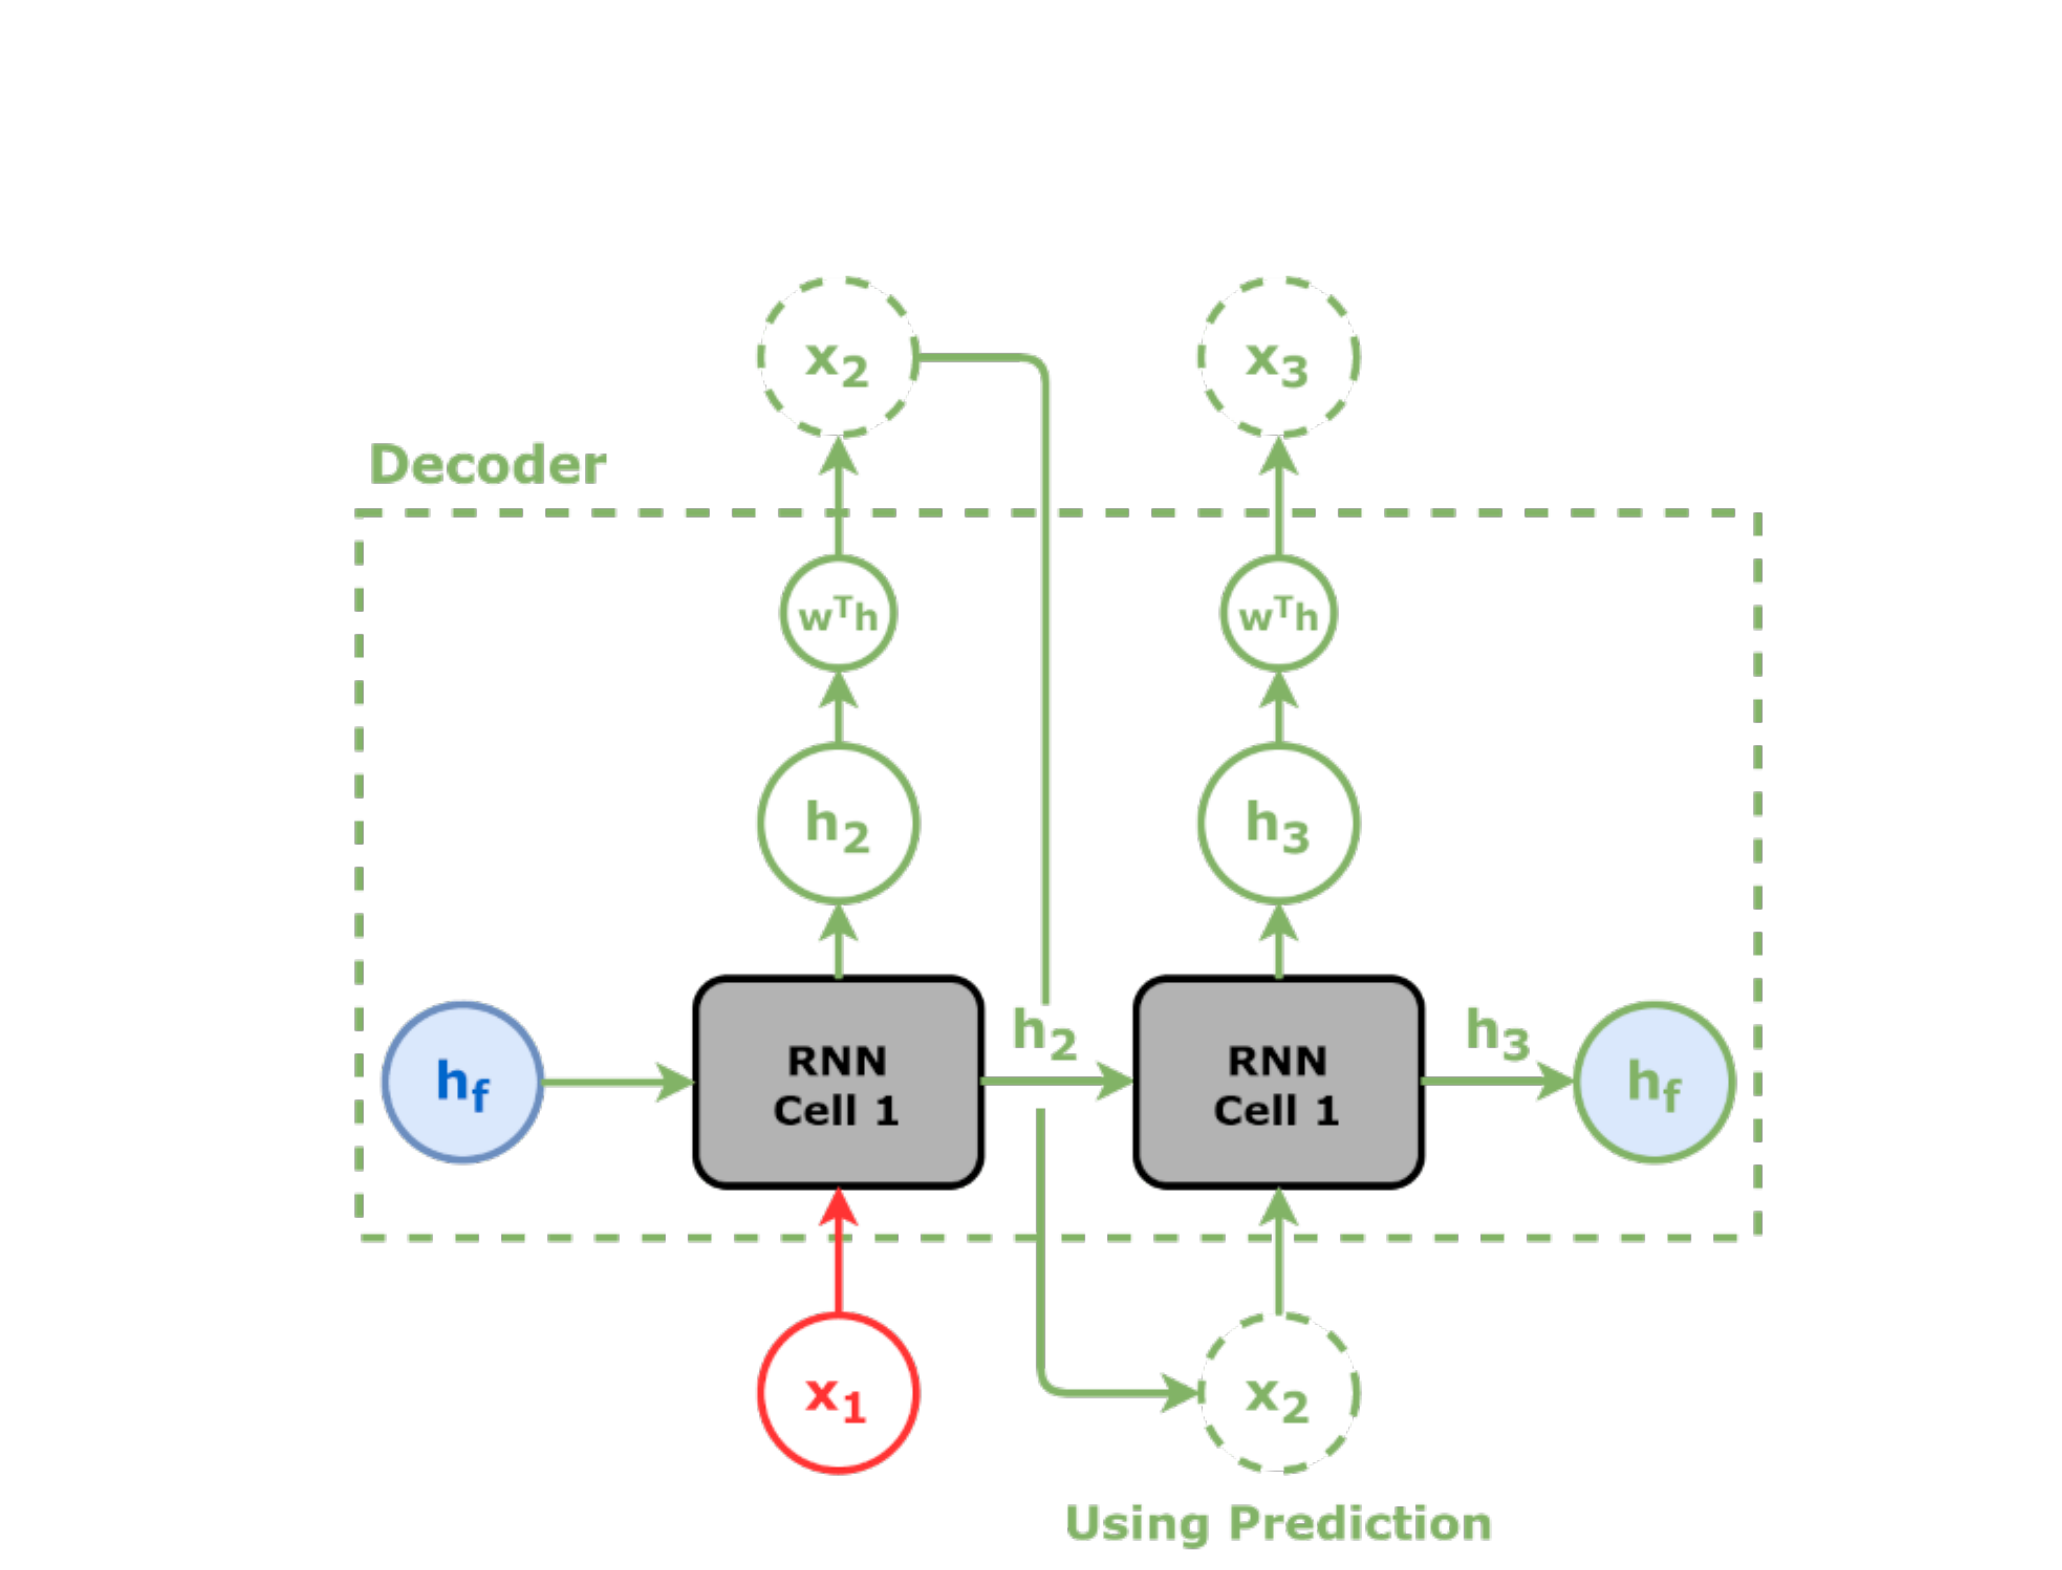

In [ ]:
class Decoder(nn.Module):
    def __init__(self, n_features, hidden_dim):
        super().__init__()
        self.n_features=n_features
        self.hidden_dim=hidden_dim
        